# 상관분석과 분산분석

matplotlib을 이용해 시각화 하기

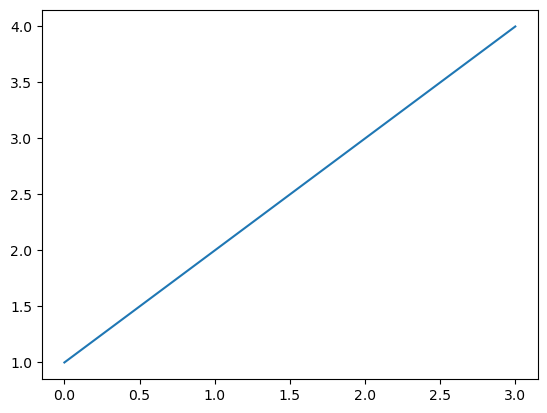

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4])
plt.show()

In [2]:
x = range(0, 100)
y = [v*v for v in x]

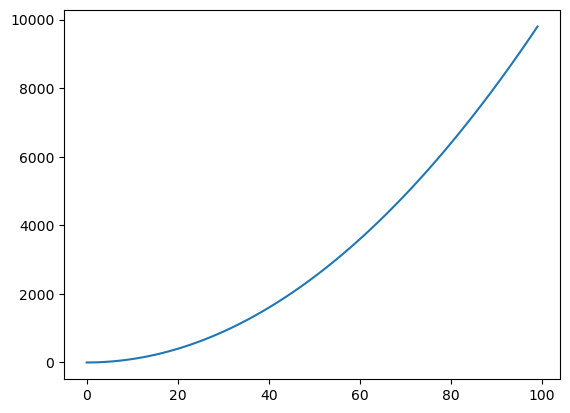

In [3]:
y = []
for v in x:
    y.append(v*v)
plt.plot(x,y)

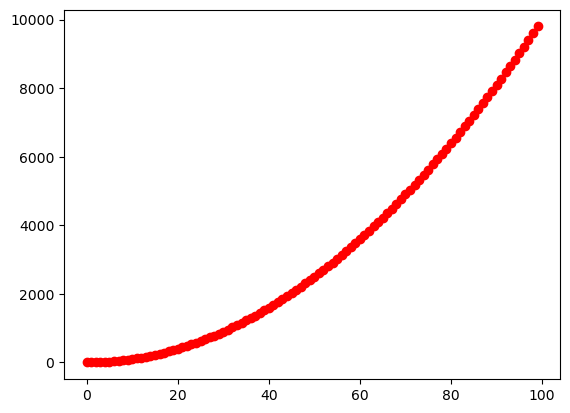

In [5]:
plt.plot(x, y, 'ro')   # r은 빨간색, o는 출력될 점의 모양
plt.show()

상관분석하기

In [7]:
import numpy as np
np.random.seed(1)
x = np.random.randint(0, 50, 500)     #0~50사이의 난수 500개 생성
y = x + np.random.normal(0, 10, 500)  #x와 양의 상관관계를 갖는 y를 생성(noise포함)
np.corrcoef(x,y)

array([[1.        , 0.81989877],
       [0.81989877, 1.        ]])

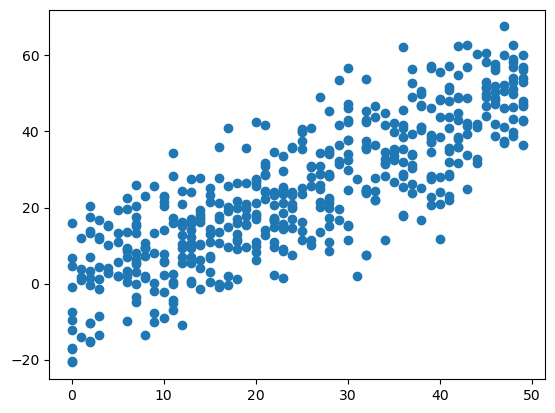

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
x = np.random.randint(0, 50, 500)
y = 100 - x + np.random.normal(0, 5, 500)
np.corrcoef(x, y)

array([[ 1.        , -0.93512287],
       [-0.93512287,  1.        ]])

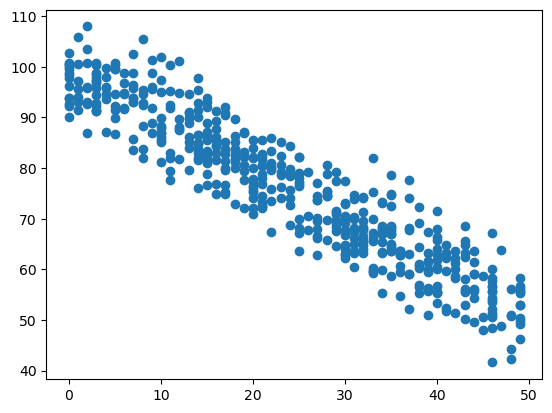

In [10]:
plt.scatter(x, y)
plt.show()

In [12]:
#상관관계가 없을 경우, 랜덤한 값으로 이뤄진 x와 y를 생성하여 상관계수 구하기
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)
np.corrcoef(x, y)  # p에 가까운 값이 나옴

array([[1.        , 0.00103722],
       [0.00103722, 1.        ]])

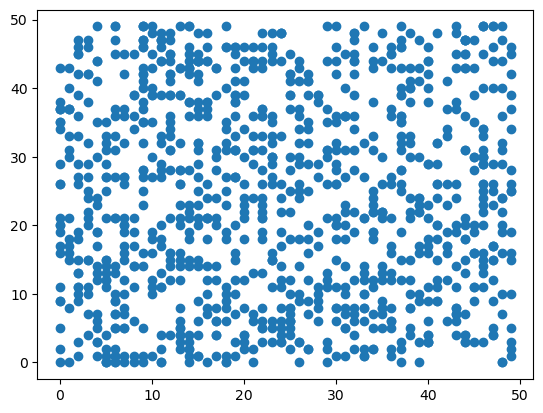

In [13]:
plt.scatter(x, y)
plt.show()

주어진 데이터로 일원 분산분석(one way Anova)

In [14]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
data = np.genfromtxt('altman_910.txt', delimiter=',')
#print(data)

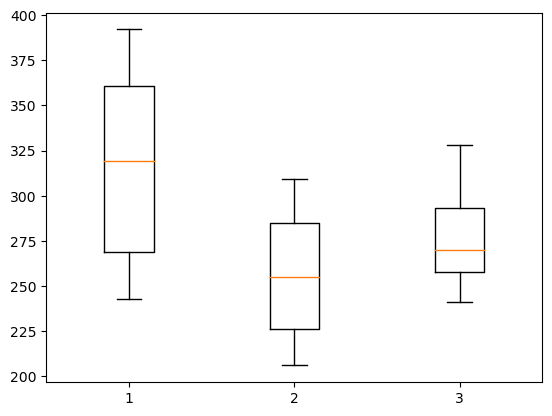

In [20]:
#첫 열의 값이 1이면 group1, 2이면 group2로 나누기
group1 = data[data[:,1]==1, 0]
group2 = data[data[:,1]==2, 0]
group3 = data[data[:,1]==3, 0]

plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [21]:
#다음 자료에서 일원 분산분석하기
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.04358933495917824)

각 그룹쌍에 대해서 t 검정하기

In [22]:
print(stats.ttest_ind(group1, group2))
print(stats.ttest_ind(group2, group3))
print(stats.ttest_ind(group3, group1))

Ttest_indResult(statistic=2.5581789927784295, pvalue=0.02184081286794004)
Ttest_indResult(statistic=-1.0724508202985763, pvalue=0.30461196197608215)
Ttest_indResult(statistic=-1.326611291434599, pvalue=0.21151930405600672)


group1과 group2의 평균값에 대해 다중 비교하기

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data[:, 0],
                          groups=data[:,1],
                          alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,-60.1806,0.0355,-116.619,-3.7421,True
1.0,3.0,-38.625,0.3215,-104.8404,27.5904,False
2.0,3.0,21.5556,0.6802,-43.2295,86.3406,False
